In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('train.csv')

In [7]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [9]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [10]:
df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

In [11]:
df = df.drop('id', 1)

In [12]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [13]:
df['vendor_id'].unique()

array([2, 1], dtype=int64)

In [14]:
df['vendor_id'].value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

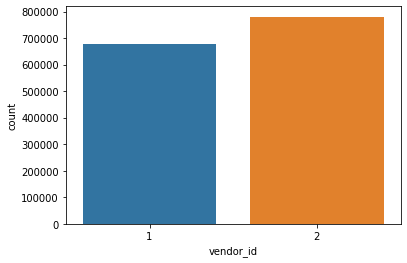

In [15]:
sns.countplot(df['vendor_id'])
plt.show()

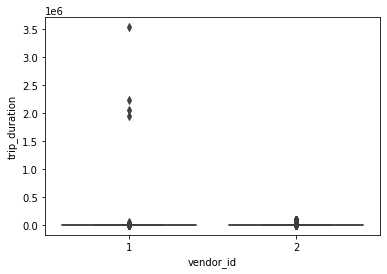

In [16]:
sns.boxplot(x='vendor_id', y='trip_duration', data=df)
plt.show()

In [17]:
df['vendor_id'] = df['vendor_id'].map({1:0, 2:1})

In [18]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,1,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,0,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,1,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,1,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,1,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [19]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [20]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,1,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,0,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,1,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,1,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,1,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [21]:
df['pickup_date'] = df['pickup_datetime'].dt.date
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date
0,1,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14
1,0,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12
2,1,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19
3,1,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06
4,1,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26


In [22]:
df['pickup_datetime'].dt.month.value_counts()

3    256189
4    251645
5    248487
2    238300
6    234316
1    229707
Name: pickup_datetime, dtype: int64

In [23]:
df['pickup_month'] = df['pickup_datetime'].dt.month
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_month
0,1,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,3
1,0,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,6
2,1,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,1
3,1,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,4
4,1,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,3


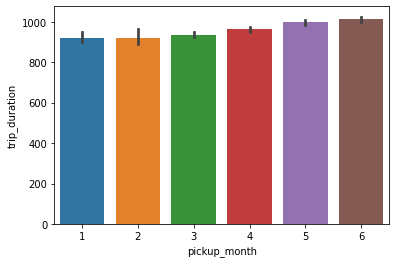

In [24]:
sns.barplot(x='pickup_month', y='trip_duration', data=df)
plt.show()

In [25]:
df['pickup_datetime'].dt.dayofweek

0          0
1          6
2          1
3          2
4          5
          ..
1458639    4
1458640    6
1458641    4
1458642    1
1458643    1
Name: pickup_datetime, Length: 1458644, dtype: int64

In [26]:
df['pickup_dayofweek'] = df['pickup_datetime'].dt.dayofweek
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_month,pickup_dayofweek
0,1,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,3,0
1,0,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,6,6
2,1,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,1,1
3,1,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,4,2
4,1,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,3,5


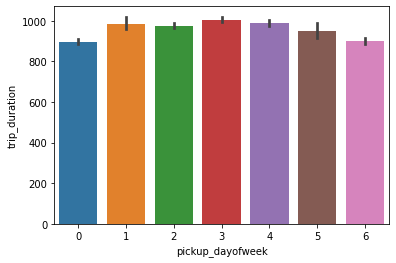

In [27]:
sns.barplot(x=df['pickup_dayofweek'], y=df['trip_duration'])
plt.show()

In [28]:
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_month,pickup_dayofweek,pickup_hour
0,1,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,3,0,17
1,0,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,6,6,0
2,1,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,1,1,11
3,1,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,4,2,19
4,1,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,3,5,13


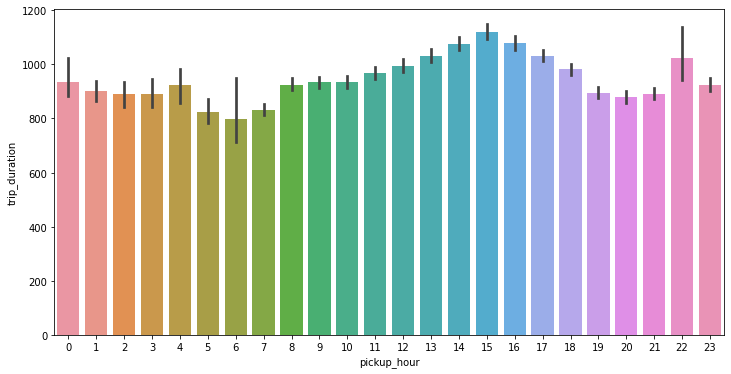

In [29]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['pickup_hour'], y=df['trip_duration'])
plt.show()

In [30]:
df['pickup_slot'] = np.select(
                            [df['pickup_hour'].between(0,3), 
                            df['pickup_hour'].between(4,7), 
                            df['pickup_hour'].between(8,11), 
                            df['pickup_hour'].between(12,15), 
                            df['pickup_hour'].between(16,18), 
                            df['pickup_hour'].between(19,21), 
                            df['pickup_hour'].between(22,23)], 
                            ['Late_Night','Early_Morning','Morning','Noon','Evening','Night','Midnight',]
)
                            
                            

In [31]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_month,pickup_dayofweek,pickup_hour,pickup_slot
0,1,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,3,0,17,Evening
1,0,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,6,6,0,Late_Night
2,1,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,1,1,11,Morning
3,1,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,4,2,19,Night
4,1,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,3,5,13,Noon


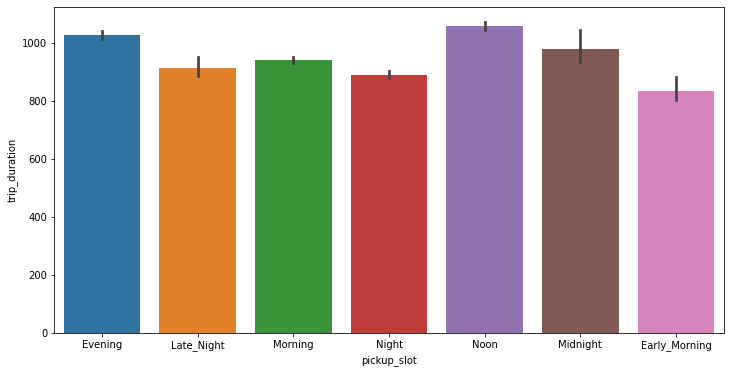

In [32]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['pickup_slot'], y=df['trip_duration'])
plt.show()

In [33]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_month,pickup_dayofweek,pickup_hour,pickup_slot
0,1,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,3,0,17,Evening
1,0,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,6,6,0,Late_Night
2,1,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,1,1,11,Morning
3,1,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,4,2,19,Night
4,1,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,3,5,13,Noon


In [34]:
def timeFeatures(df):
    df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
    df['dropoff_month'] = df['dropoff_datetime'].dt.month
    df['dropoff_dayofweek'] = df['dropoff_datetime'].dt.dayofweek
    df['dropoff_hour'] = df['dropoff_datetime'].dt.hour
    df['dropoff_slot'] = np.select(
                            [df['dropoff_hour'].between(0,3), 
                            df['dropoff_hour'].between(4,7), 
                            df['dropoff_hour'].between(8,11), 
                            df['dropoff_hour'].between(12,15), 
                            df['dropoff_hour'].between(16,18), 
                            df['dropoff_hour'].between(19,21), 
                            df['dropoff_hour'].between(22,23)], 
                            ['Late_Night','Early_Morning','Morning','Noon','Evening','Night','Midnight',]
)
    return df

In [35]:
df = timeFeatures(df)

In [36]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_month,pickup_dayofweek,pickup_hour,pickup_slot,dropoff_month,dropoff_dayofweek,dropoff_hour,dropoff_slot
0,1,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,3,0,17,Evening,3,0,17,Evening
1,0,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,6,6,0,Late_Night,6,6,0,Late_Night
2,1,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,1,1,11,Morning,1,1,12,Noon
3,1,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,4,2,19,Night,4,2,19,Night
4,1,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,3,5,13,Noon,3,5,13,Noon


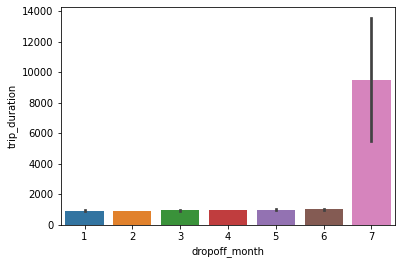

In [37]:
sns.barplot(x='dropoff_month', y='trip_duration', data=df)
plt.show()

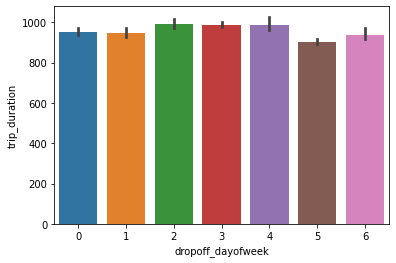

In [38]:
sns.barplot(x=df['dropoff_dayofweek'], y=df['trip_duration'])
plt.show()

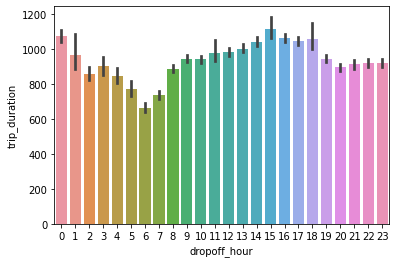

In [39]:
sns.barplot(x=df['dropoff_hour'], y=df['trip_duration'])
plt.show()

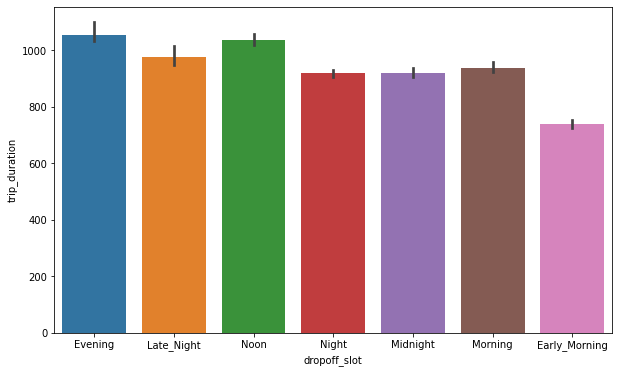

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['dropoff_slot'], y=df['trip_duration'])
plt.show()

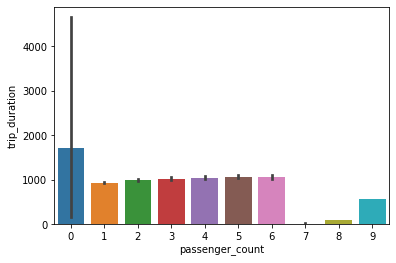

In [42]:
sns.barplot(x=df['passenger_count'], y=df['trip_duration'])
plt.show()

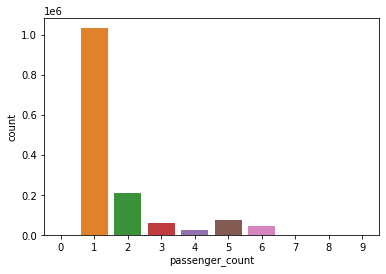

In [43]:
sns.countplot(df['passenger_count'])
plt.show()

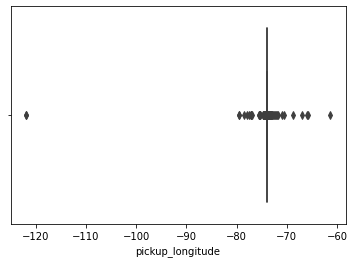

In [44]:
sns.boxplot(df['pickup_longitude'])
plt.show()

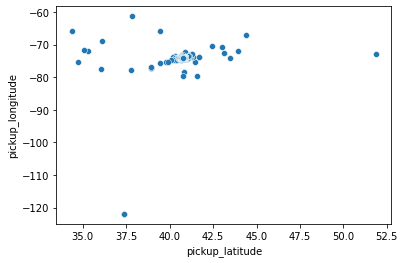

In [45]:
sns.scatterplot(x=df['pickup_latitude'], y=df['pickup_longitude'])
plt.show()

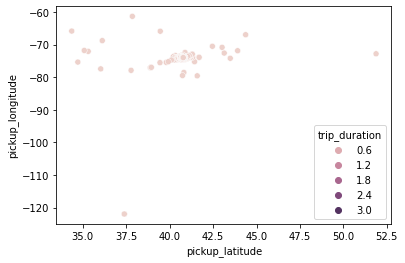

In [46]:
sns.scatterplot(x=df['pickup_latitude'], y=df['pickup_longitude'], hue=df['trip_duration'])
plt.show()

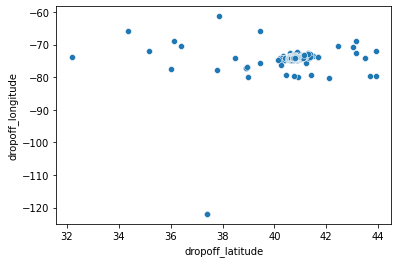

In [47]:
sns.scatterplot(x=df['dropoff_latitude'], y=df['dropoff_longitude'])
plt.show()

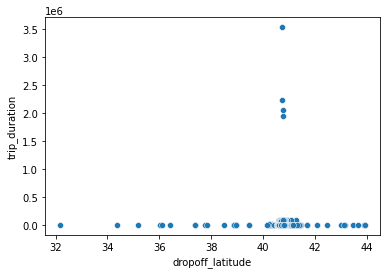

In [48]:
sns.scatterplot(x=df['dropoff_latitude'], y=df['trip_duration'])
plt.show()

In [50]:
df['store_and_fwd_flag'].nunique()

2

In [51]:
df['store_and_fwd_flag'].unique()

array(['N', 'Y'], dtype=object)

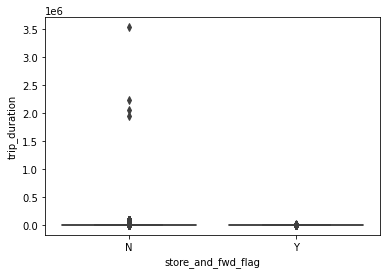

In [52]:
sns.boxplot(x=df['store_and_fwd_flag'], y=df['trip_duration'])
plt.show()

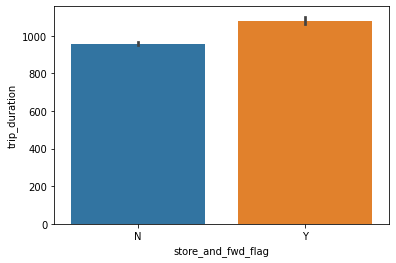

In [53]:
sns.barplot(x=df['store_and_fwd_flag'], y=df['trip_duration'])
plt.show()

In [54]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_month,pickup_dayofweek,pickup_hour,pickup_slot,dropoff_month,dropoff_dayofweek,dropoff_hour,dropoff_slot
0,1,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,3,0,17,Evening,3,0,17,Evening
1,0,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,6,6,0,Late_Night,6,6,0,Late_Night
2,1,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,1,1,11,Morning,1,1,12,Noon
3,1,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,4,2,19,Night,4,2,19,Night
4,1,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,3,5,13,Noon,3,5,13,Noon


In [55]:
df = df.drop(['pickup_datetime', 'dropoff_datetime', 'pickup_date'], axis=1)

In [56]:
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_dayofweek,pickup_hour,pickup_slot,dropoff_month,dropoff_dayofweek,dropoff_hour,dropoff_slot
0,1,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,0,17,Evening,3,0,17,Evening
1,0,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,6,0,Late_Night,6,6,0,Late_Night
2,1,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,1,11,Morning,1,1,12,Noon
3,1,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,2,19,Night,4,2,19,Night
4,1,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,5,13,Noon,3,5,13,Noon


In [57]:
df.to_csv('train_EDA.csv', index=False)